In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('display.max_colwidth', None)

## Retrieve MSc'22 test set - detailed version

In [2]:
test = pd.read_csv('/Users/isdeniz/Documents/msc-notebooks/msc/label_mapping/msc_dataset_preprocessing/test_clean_concat_200_detailed_data.csv')

In [3]:
test.shape

(10466, 8)

In [4]:
test.head()

original_issue_title  \
0                                                       Propose to officially support ARM64 platform   
1                                            [typescript-angular] how to customize output filenames?   
2  ResourceBundleThemeSource should resolve *.properties like ResourceBundleMessageSource [SPR-7252]   
3                                                       Support multiple SpringFactoriesLoader files   
4                                        Percolate query, FVH highlighter does not work on subfields   

                                                                               preprocessed_title  \
0                                                    propose to officially support arm64 platform   
1                                           typescript angular how to customize output filenames?   
2  resourcebundlethemesource should resolve .properties like resourcebundlemessagesource spr 7252   
3                                                    support multiple springfactoriesloader files   
4                                      percolate query fvh highlighter does not work on subfields   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [5]:
test.rename(columns={"labels_name":"original_label"}, inplace = True)
test.rename(columns={"mapLabel":"issue_label"}, inplace = True)
test.rename(columns={"labels_cat":"labels"}, inplace = True)

## Retrieve predictions of the RoBERTa model for the MSc test set

In [6]:
roberta_preds = pd.read_pickle('/Users/isdeniz/Documents/msc-notebooks/msc/RoBERTa/msc_test_roberta_preds.pkl')
print(roberta_preds.shape)

(10466, 4)


In [7]:
roberta_preds.head()

,text,labels,actual_labels,prediction
0,time 2019-10-31T02:23:02Z author CONTRIBUTOR repo grpc/grpc-java title propose to officially support arm64 platform body please answer these questions before submitting a feature request. is your feature request related to a problem? a clear and concise description of what the problem is. ex. i'm always frustrated when ... yes recently i am working on promoting hadoop building on arm64 server while an error occured due to missing the io.grpc protoc gen grpc java exe linux aarch_64 1.15.1 artifact for aarch platform see error messages info info build failure info info total time 03 13 min info finished at 2019 05 17t09 28 55 08 00 info error failed to execute goal org.xolstice.maven.plugins protobuf maven plugin 0.5.1 compile custom default on project hadoop yarn csi missing error error 1 io.grpc protoc gen grpc java exe linux aarch_64 1.15.1 error error try downloading the file manually from the project website. error error then install it using the command error mvn install install file dgroupid io.grpc dartifactid protoc gen grpc java dversion 1.15.1 dclassifier linux aarch_64 dpackaging exe dfile path to file error error alternatively if you host,1,1,1
1,time 2018-08-03T12:18:12Z author CONTRIBUTOR repo OpenAPITools/openapi-generator title typescript angular how to customize output filenames? body do someone can help me to customize output files names? given the tag below my resource i want to obtain the output file my resource.service.ts instead of myresource.service.ts given the model below mymodel i want to obtain the output file my model.ts instead of mymodel.ts many thanks for your help,1,1,1
2,time 2010-06-01T16:43:42Z author COLLABORATOR repo spring-projects/spring-framework title resourcebundlethemesource should resolve .properties like resourcebundlemessagesource spr 7252 body alvin chee https jira.spring.io secure viewprofile.jspa?name alvincys opened spr 7252 https jira.spring.io browse spr 7252?redirect false and commented if current request context is en_us and no theme_en_us.properties specified or no key specified in theme_en_us.properties it should fallback to theme_en.properties then theme.properties. bean id themesource class org.springframework.ui.context.support.resourcebundlethemesource property name basenameprefix value theme_ bean bean id themeresolver class org.springframework.web.servlet.theme.sessionthemeresolver property name defaultthemename value en_us bean affects 3.0.2 issue links issue resourcebundlethemesource should resolve .properties like resourcebundlemessagesource _ is duplicated by _,1,1,1
3,time 2022-05-05T06:18:07Z author MEMBER repo spring-projects/spring-framework title support multiple springfactoriesloader files body for aot we'd like to be able to load a meta inf spring aot.factories files rather than meta inf spring.factories .,1,1,1
4,time 2022-01-12T08:42:59Z author NONE repo elastic/elasticsearch title percolate query fvh highlighter does not work on subfields body github is reserved for bug reports and feature requests it is not the place for general questions. if you have a question or an unconfirmed bug please visit the forums https discuss.elastic.co c elasticsearch . please also check your os is supported https www.elastic.co support matrix show_os . if it is not the issue is likely to be closed. for security vulnerabilities please only send reports to security elastic.co. see https www.elastic.co community security for more information. please fill in the following details to help us reproduce the bug elasticsearch version bin elasticsearch version 7.16.2 plugins installed jvm version java version os version uname a if on a unix like system description of the problem including expected versus actual behavior percolated queries no longer highlight subfields with fvh higlighter. i expect them to be highlighted as in the previous version of es. steps to reproduce index mappings with a field and subfield with identical analysis both 

In [8]:
mapping = {0: 'bug', 1: 'enhancement', 2: 'question'}

In [9]:
roberta_preds['prediction'] = roberta_preds['prediction'].map(mapping)

In [10]:
roberta_preds['actual_labels'] = roberta_preds['actual_labels'].map(mapping)

In [11]:
actual_labels = roberta_preds['actual_labels']
predicted_labels = roberta_preds['prediction']

confusion_matrix = confusion_matrix(actual_labels, predicted_labels)

class_report = classification_report(actual_labels, predicted_labels, target_names=['bug', 'enhancement', 'question'], digits=3)

conf_matrix_df = pd.DataFrame(confusion_matrix, index=['bug', 'enhancement', 'question'], columns=['bug', 'enhancement', 'question'])

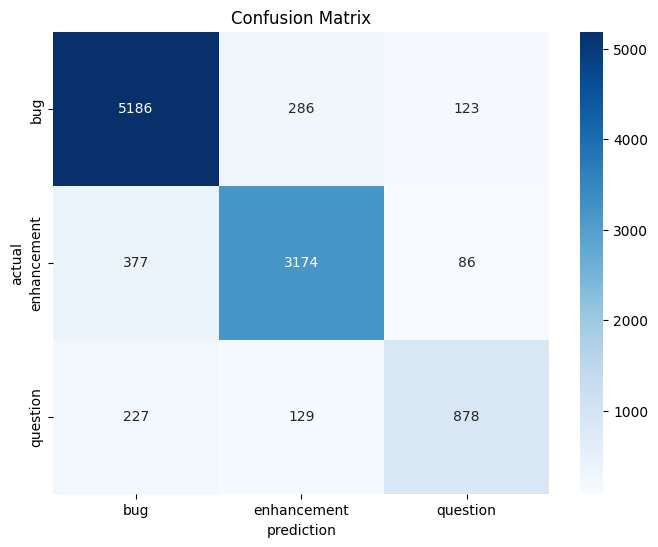

In [12]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_df,
            annot = True,
            fmt = 'd',
            cmap = 'Blues')
plt.xlabel('prediction')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
print(class_report)

              precision    recall  f1-score   support

         bug      0.896     0.927     0.911      5595
 enhancement      0.884     0.873     0.878      3637
    question      0.808     0.712     0.757      1234

    accuracy                          0.883     10466
   macro avg      0.863     0.837     0.849     10466
weighted avg      0.881     0.883     0.882     10466



In [14]:
test['roberta_prediction'] = roberta_preds['prediction']
test.tail()

,original_issue_title,preprocessed_title,original_issue_body,preprocessed_body,original_label,text,issue_label,labels,roberta_prediction
10461,能不依赖fastjson么？,fastjson,## Ask your question here\r\n是否可以通过配置不依赖fastjson使用其他json，fastjson经常被爆漏洞几百个项目更新太悲催了,ask your question here fastjsonjsonfastjson,['type/question'],time 2022-05-23T08:46:05Z author NONE repo apache/dubbo title fastjson body ask your question here fastjsonjsonfastjson,question,2,question
10462,SQL template delete to enter hotkeys,sql template delete to enter hotkeys,"Now, the SQL template needs to enter hotkeys. For example, press the hotkey and SF, and then display ""select*from"".\r\n\r\nI want to input short text, then display the description SQL, delete the input hotkey to speed up, press SF and then display ""select * from"".",now the sql template needs to enter hotkeys. for example press the hotkey and sf and then display select from . i want to input short text then display the description sql delete the input hotkey to speed up press sf and then display select from .,"['feature request', 'duplicate', 'xf:sql']",time 2022-07-02T08:21:38Z author NONE repo dbeaver/dbeaver title sql template delete to enter hotkeys body now the sql template needs to enter hotkeys. for example press the hotkey and sf and then display select from . i want to input short text then display the description sql delete the input hotkey to speed up press sf and then display select from .,enhancement,1,enhancement
10463,It's not sharding when execute sql,it's not sharding when execute sql,"## Question\r\n\r\n**For English only**, other languages will not accept.\r\n\r\nBefore asking a question, make sure you have:\r\n\r\n- Googled your question.\r\n- Searched open and closed [GitHub issues](https://github.com/sharding-sphere/sharding-sphere/issues).\r\n- Read documentation: [Sharding-Sphere Doc](http://shardingsphere.io/document/current/en/overview/).\r\n\r\nPlease pay attention on issues you submitted, because we maybe need more details. \r\nIf no response **more than 7 days** and we cannot reproduce it on current information, we will **close it**.\r\n\r\n\r\n### Which version of Sharding-Jdbc do you using?\r\n3.0.0M3\r\n\r\n### My configs\r\nuse spring namespace, such as\r\n<sharding:table-rule \r\nlogic-table=""order"" \r\nactual-data-nodes=""database.order_$->{1..31}"" \r\ndatabase-strategy-ref=""myStrategy"" />\r\n\r\n\r\n\r\n\r\n### Steps to reproduce the behavior \r\nexecute sql ：\r\n`select time,order from order where (time='20181115')` \r\nit will get data from database.order_15 (my data in here), in fact work well.\r\n\r\nwhen i change actual-data-nodes to `database.order_$->{1..3}` and change stragery make 0-9 to 1, 10-19 to 2 , rest to 3.\r\nexecute sql against, it's not data, and i create breakpoint on algorithm, found it not enter and query node 1 to 3.\r\n\r\non debug mode, i found variable `tableShardingValues` is empty when execute on method `StandareRoutingEngine.routeTables` , but i do `insert into order values ('20181111','iphone')` will enter my breakpoint.\r\n\r\nI hope to get your advice, thanks\r\n\r\n",question for english only other languages will not accept. before asking a question make sure you have googled your question. searched open and closed github issues https github.com sharding sphere sharding sphere issues . read documentation sharding sphere doc http shardingsphere.io document current en overview . please pay attention on issues you submitted because we maybe need more details. if no response more than 7 days and we cannot reproduce it on current information we will close it . which version of sharding jdbc do you using? 3.0.0m3 my configs use spring namespace such as sharding table rule logic table order actual data nodes database.order_ 1..31 database strategy ref mystrategy steps to reproduce the behavior execute sql select time order from order where time '20181115' it will get data from database.order_15 my data in here in fact work well. when i

In [15]:
test.head()

original_issue_title  \
0                                                       Propose to officially support ARM64 platform   
1                                            [typescript-angular] how to customize output filenames?   
2  ResourceBundleThemeSource should resolve *.properties like ResourceBundleMessageSource [SPR-7252]   
3                                                       Support multiple SpringFactoriesLoader files   
4                                        Percolate query, FVH highlighter does not work on subfields   

                                                                               preprocessed_title  \
0                                                    propose to officially support arm64 platform   
1                                           typescript angular how to customize output filenames?   
2  resourcebundlethemesource should resolve .properties like resourcebundlemessagesource spr 7252   
3                                                    support multiple springfactoriesloader files   
4                                      percolate query fvh highlighter does not work on subfields   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [16]:
test.shape

(10466, 9)

### Train Test Split for LLAMA3 Experiments

In [17]:
_, llama3_sample = train_test_split(
    test,
    test_size = 5000,
    stratify = test['issue_label'],
    random_state = 42
)

In [18]:
llama3_sample.head()

original_issue_title  \
3921                                                                       Improve WebFlux performance for header management [SPR-17250]   
9619                                                                Can't pass a string to n[] anymore without downgrading cypher engine   
5369                                                                               --per_file_copt requires argument changes with bzlmod   
3920  MustacheAutoConfiguration in a Servlet web application fails with a ClassNotFoundException when Spring MVC is not on the classpath   
3842                                            Create MockHttpServletRequestBuilder.accept(String ...mediatTypes) overload. [SPR-10390]   

                                                                                                                      preprocessed_title  \
3921                                                                         improve webflux performance for header management spr 17250   
9619                                                                  can't pass a string to n anymore without downgrading cypher engine   
5369                                                                                 per_file_copt requires argument changes with bzlmod   
3920  mustacheautoconfiguration in a servlet web application fails with a classnotfoundexception when spring mvc is not on the classpath   
3842                                               create mockhttpservletrequestbuilder.accept string ...mediattypes overload. spr 10390   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [19]:
llama3_sample.shape

(5000, 9)

In [20]:
llama3_sample.to_csv('llama3_test_sample_5000_msc.csv')

In [21]:
llama3_sample.to_pickle('llama3_test_sample_5000_msc.pkl')

In [22]:
llama3_sample['issue_label'].value_counts()

issue_label
bug            2673
enhancement    1738
question        589
Name: count, dtype: int64